# 라이브러리 불러오기

In [107]:
import numpy as np
import pandas as pd
import koreanize_matplotlib
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor


warnings.filterwarnings("ignore")
# pd.options.display.max_rows = None
# pd.options.display.max_columns = None
%config InlineBackend.figure_format = 'retina'


# plt.style.use('dark_background')
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'NanumGothic'

# 데이터셋 불러오기

In [89]:
train = pd.read_csv('train_모든컬럼다있는버전2.csv')
test = pd.read_csv('test_모든컬럼다있는버전2.csv')
submission = pd.read_csv('sample_submission.csv')

In [90]:
train = train.drop(columns=['BMI', '키_scaled', '체중(kg)_scaled', '심박수(BPM)_scaled', '체온(C)_scaled','BMI_scaled'])
test = test.drop(columns=['BMI', '키_scaled', '체중(kg)_scaled', '심박수(BPM)_scaled', '체온(C)_scaled','BMI_scaled'])

# 인코딩

In [91]:
# 1. gender 카테고리화
train['성별'] = train['성별'].astype('category')
test['성별'] = test['성별'].astype('category')

# 성별 : 남자 0, 여자 1
train['성별'] = train['성별'].apply(lambda x: 0 if x == '남자' else 1)
test['성별'] = test['성별'].apply(lambda x: 0 if x == '남자' else 1)

In [92]:
# 체중상태에 대해서도 범주화 진행
def weight_status(체중상태):
    if 체중상태 == '보통체중':
        return 0
    elif 체중상태 == '과체중':
        return 1
    elif 체중상태 == '비만':
        return 2

In [93]:
train['체중상태'] = train['체중상태'].apply(weight_status)
test['체중상태'] = test['체중상태'].apply(weight_status)

In [94]:
train.head(2)

,운동시간(분),성별,나이,키(cm),체중(kg),체중상태,심박수(BPM),체온(C),소모칼로리
0,26.0,1,45,175.26,69.99,0,107.0,40.89,166.0
1,7.0,1,50,198.12,102.01,1,88.0,39.61,33.0


In [95]:
test.head(2)

,운동시간(분),성별,나이,키(cm),체중(kg),체중상태,심박수(BPM),체온(C)
0,26.0,1,45,154.94,51.98,0,107.0,40.61
1,29.0,1,21,187.96,89.99,1,111.0,40.50


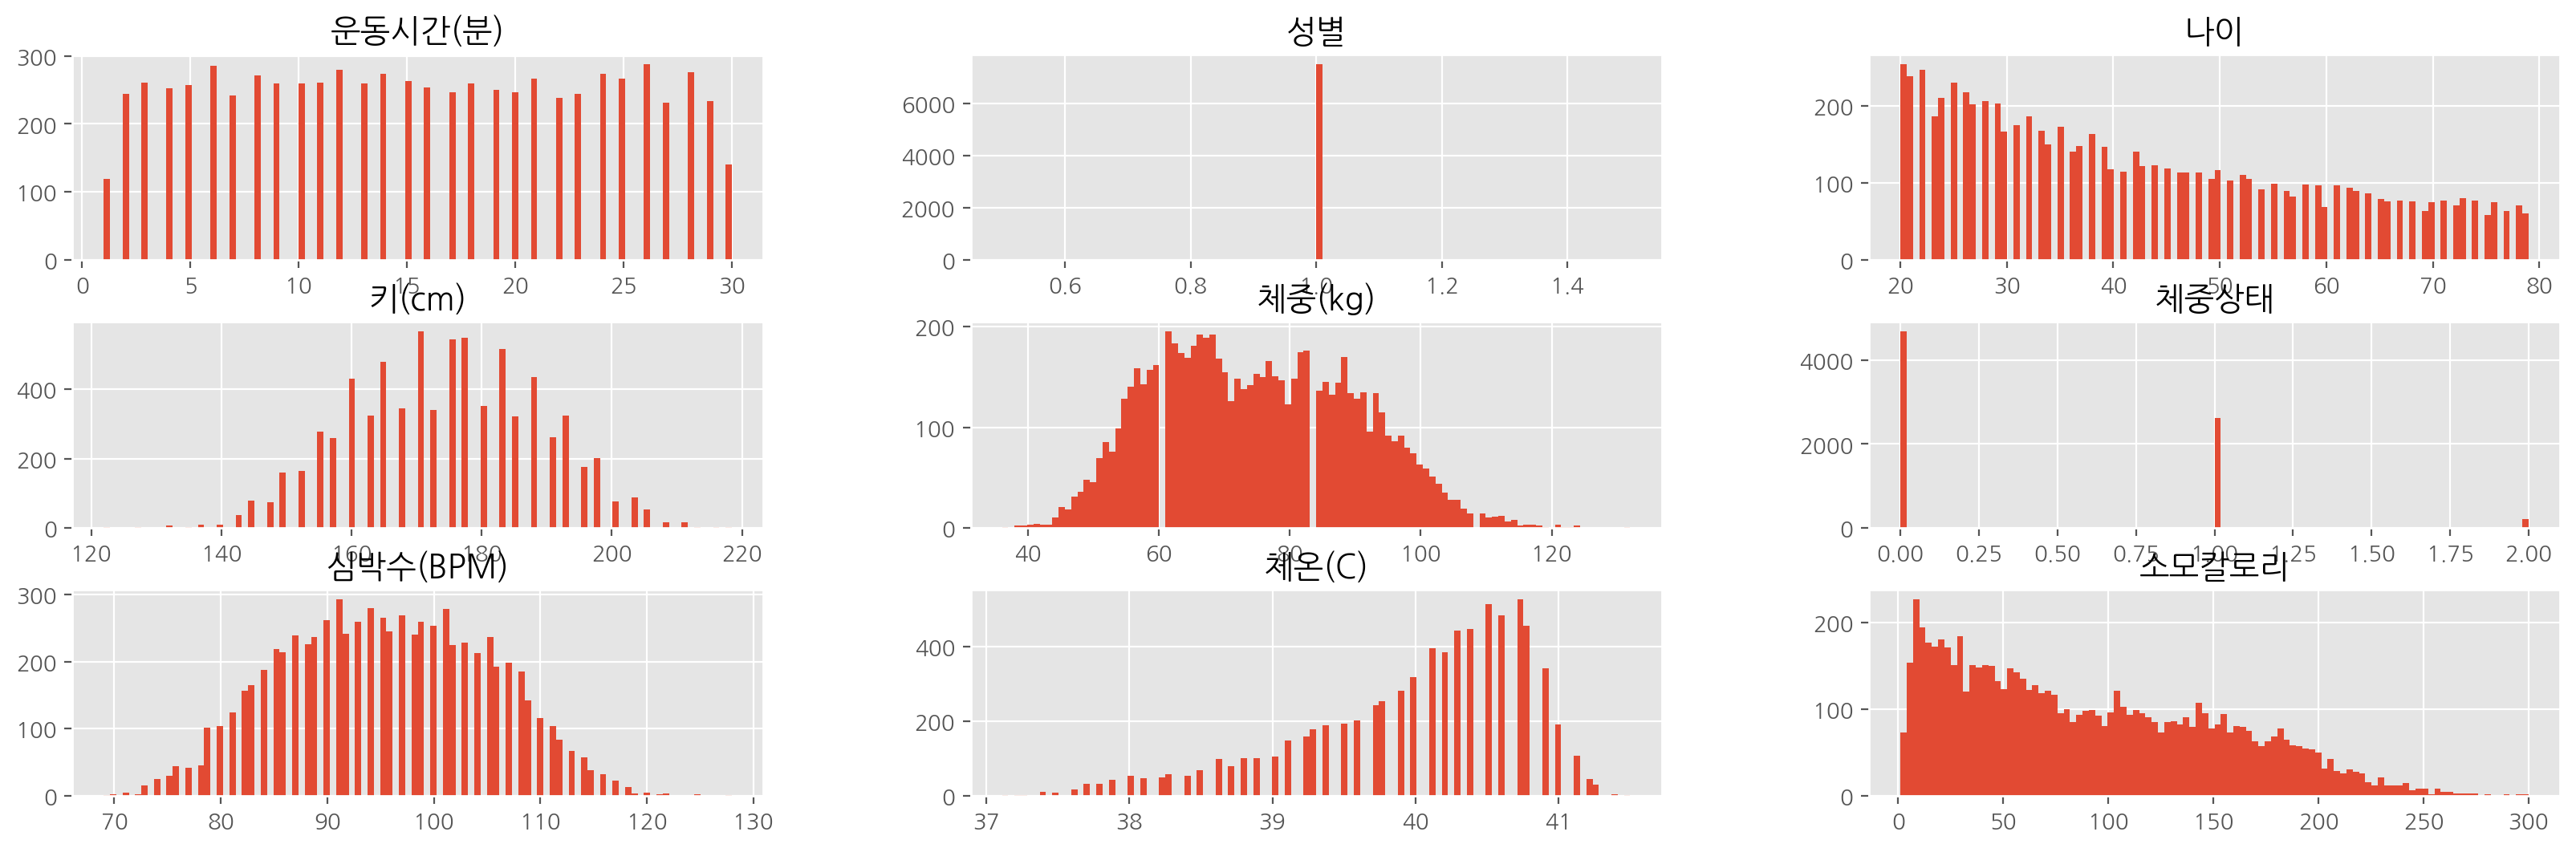

In [96]:
# 히스토그램 확인하기
train.hist(figsize=(20,6), bins = 100);

# 정규화

In [97]:
# 운동시간, 체중, 소모칼로리, 심박수, 나이, 체온 정규화 시켜주자! 

In [98]:
from sklearn.preprocessing import StandardScaler

# 숫자형 컬럼 선택
numeric_cols = ['키(cm)', '체중(kg)', '심박수(BPM)', '체온(C)', '나이', '운동시간(분)']

# StandardScaler 객체 생성
scaler = StandardScaler()

# 훈련 데이터 정규화
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])

# 테스트 데이터 정규화
test[numeric_cols] = scaler.transform(test[numeric_cols])

# 정규화된 훈련 데이터 확인
train.head()



,운동시간(분),성별,나이,키(cm),체중(kg),체중상태,심박수(BPM),체온(C),소모칼로리
0,1.256628,1,0.140030,0.052654,-0.332108,0,1.199774,1.110191,166.0
1,-1.017530,1,0.436203,1.649312,1.787366,1,-0.782140,-0.520676,33.0
2,-1.017530,1,-0.807721,1.117092,1.589451,1,-0.990762,-0.520676,23.0
3,0.179395,1,-0.570783,-0.479565,-0.530023,0,0.365284,-0.023772,91.0
4,-0.778145,1,-0.274611,0.230061,0.133223,0,-0.782140,-0.941134,32.0


In [99]:
# 정규화된 훈련 데이터 확인
test.head()

,운동시간(분),성별,나이,키(cm),체중(kg),체중상태,심박수(BPM),체온(C)
0,1.256628,1,0.140030,-1.366597,-1.524230,0,1.199774,0.753438
1,1.615705,1,-1.281597,0.939686,0.991735,1,1.617019,0.613286
2,-0.538760,1,0.910078,0.052654,0.133223,0,-0.573517,-0.023772
3,1.017243,1,-0.452314,0.584873,0.926205,1,1.304086,0.970038
4,1.615705,1,1.443189,-0.302159,-0.530023,0,2.138576,1.390496


# 다중공선성 확인 (VIF)

In [100]:
# 종속 변수와 독립 변수 분리
X = train[['운동시간(분)', '나이', '키(cm)', '체중(kg)', '심박수(BPM)', '체온(C)']]

# VIF 계산

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

print(vif)

   VIF Factor  features
0    8.211477   운동시간(분)
1    1.083957        나이
2   13.018170     키(cm)
3   13.125370    체중(kg)
4    3.684450  심박수(BPM)
5    5.491420     체온(C)


In [101]:
# 종속 변수와 독립 변수 분리
X = test[['운동시간(분)', '나이', '키(cm)', '체중(kg)', '심박수(BPM)', '체온(C)']]

# VIF 계산

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

print(vif)

   VIF Factor  features
0    7.891826   운동시간(분)
1    1.089163        나이
2   12.640769     키(cm)
3   12.743377    체중(kg)
4    3.655437  심박수(BPM)
5    5.347346     체온(C)


### 주성분분석 진행

#### train

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [103]:
# 숫자형 변수들을 정규화
scaler = StandardScaler()
numeric_cols = ['키(cm)', '체중(kg)', '운동시간(분)']


In [104]:
# 숫자형 변수들을 정규화
scaler = StandardScaler()
numeric_cols = ['키(cm)', '체중(kg)', '운동시간(분)']

# StandardScaler로 스케일링을 수행합니다.
train_scaled = scaler.fit_transform(train[numeric_cols])
test_scaled = scaler.transform(test[numeric_cols])

# PCA를 적용합니다.
pca = PCA(n_components=3)
train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)

# PCA 결과를 기존 데이터프레임에 반영합니다.
train[numeric_cols] = train_pca
test[numeric_cols] = test_pca

# 최종 데이터셋

In [105]:
train

,운동시간(분),성별,나이,키(cm),체중(kg),체중상태,심박수(BPM),체온(C),소모칼로리
0,-0.277057,1,0.140030,-0.198451,1.255404,0,1.199774,1.110191,166.0
1,0.101656,1,0.436203,2.430783,-1.015496,1,-0.782140,-0.520676,33.0
2,0.338044,1,-0.807721,1.914500,-1.014905,1,-0.990762,-0.520676,23.0
3,-0.036391,1,-0.570783,-0.714007,0.178771,0,0.365284,-0.023772,91.0
4,-0.065384,1,-0.274611,0.257405,-0.778237,0,-0.782140,-0.941134,32.0
...,...,...,...,...,...,...,...,...,...
7495,0.214980,1,1.917064,-2.467788,0.777054,0,0.886840,0.753438,151.0
7496,-0.288705,1,-1.281597,-0.463358,0.537018,0,0.886840,0.893591,114.0
7497,0.133977,1,0.850844,1.459936,-0.896328,1,-0.573517,-0.660829,41.0
7498,0.011830,1,-0.452314,0.084912,-0.418967,1,0.156662,0.256534,57.0


In [106]:
test

,운동시간(분),성별,나이,키(cm),체중(kg),체중상태,심박수(BPM),체온(C)
0,-0.116450,1,0.140030,-2.044970,1.254797,0,1.199774,0.753438
1,0.030386,1,-1.281597,1.364632,1.616759,1,1.617019,0.613286
2,0.059110,1,0.910078,0.131798,-0.538441,0,-0.573517,-0.023772
3,0.237315,1,-0.452314,1.067808,1.018913,1,1.304086,0.970038
4,-0.167539,1,1.443189,-0.589530,1.614655,0,2.138576,1.390496
...,...,...,...,...,...,...,...,...
7495,-0.138555,1,0.495437,0.693514,1.495942,0,1.095463,1.110191
7496,0.217352,1,-1.044659,0.538169,-1.375392,1,-1.199385,-1.438039
7497,0.088092,1,-0.037673,-1.590325,1.016529,0,0.156662,0.753438
7498,-0.187027,1,0.317734,-1.119088,-0.899342,0,-1.303696,-0.660829


# 머신러닝1

## CatBoostRegressor 1차시도 3.4346998953 점 

In [69]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

In [ ]:
# 모델 학습
X = train.drop('소모칼로리', axis=1)  
y = train['소모칼로리']

model = CatBoostRegressor(loss_function='RMSE', depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1) 
model.fit(X, y)

# 모델 예측
X_test = test 
y_predict = model.predict(X_test)
y_predict[:5]

In [86]:
submission = pd.read_csv('sample_submission.csv')
submission['Calories_Burned'] = y_predict

In [87]:
submission.to_csv('캣부스트5.csv', index = False)

## CatBoostRegressor 2차시도 7.5392430147 점

In [ ]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

# 모델 및 하이퍼파라미터 설정
model = CatBoostRegressor()
param_grid = {
    'iterations': [100, 200, 300, 400],
    'depth': [2, 3, 4, 5, 6],
    'learning_rate': [0.1, 0.2, 0.5, 1]
}

# 그리드 서치 수행
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

# 결과 출력
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# 출력 결과물
# Best parameters: {'depth': 2, 'iterations': 100, 'learning_rate': 0.1}
# Best score: -0.003947882347016973

In [ ]:
# 모델 학습
X = train.drop('소모칼로리', axis=1)  
y = train['소모칼로리']

model = CatBoostRegressor(loss_function='RMSE', depth=2, iterations=100, learning_rate=0.1) 
model.fit(X, y)

# 모델 예측
X_test = test 
y_predict = model.predict(X_test)
y_predict[:5]

In [111]:
submission = pd.read_csv('sample_submission.csv')
submission['Calories_Burned'] = y_predict

In [112]:
submission.to_csv('캣부스트7.csv', index = False)